In [7]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

In [2]:
img_n=16

In [9]:
images=np.load('./image/photos.npz')
x=images['x']
y=images['y']
labels=['お寿司','サラダ','麻婆豆腐']

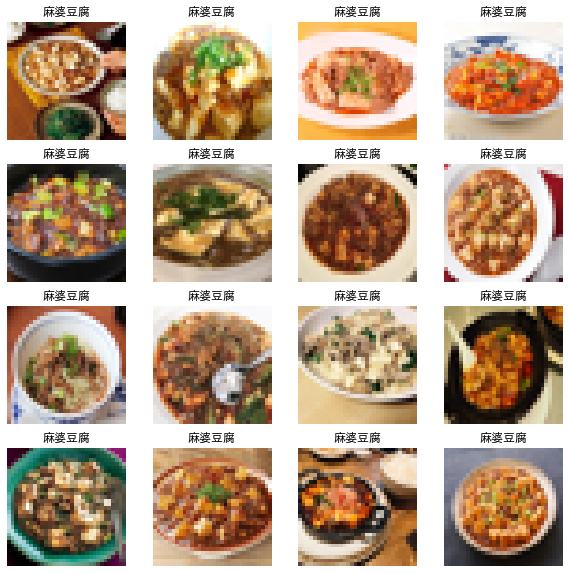

In [13]:
idx=200

plt.figure(figsize=(10,10))
for i in range(img_n):
    plt.subplot(4,4,i+1)
    plt.axis('off')
    plt.title(labels[y[i+idx]])
    plt.imshow(x[i+idx])
plt.show()

## データの水増し

In [14]:
import matplotlib.pyplot as plt
import cv2

In [17]:
#画像データ読み込み
photos=np.load('./image/photos.npz')
x=photos['x']
img=x[10]

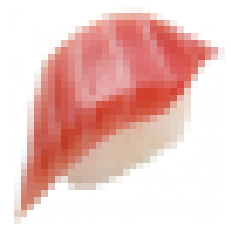

In [19]:
plt.imshow(img)
plt.axis('off')
plt.show()

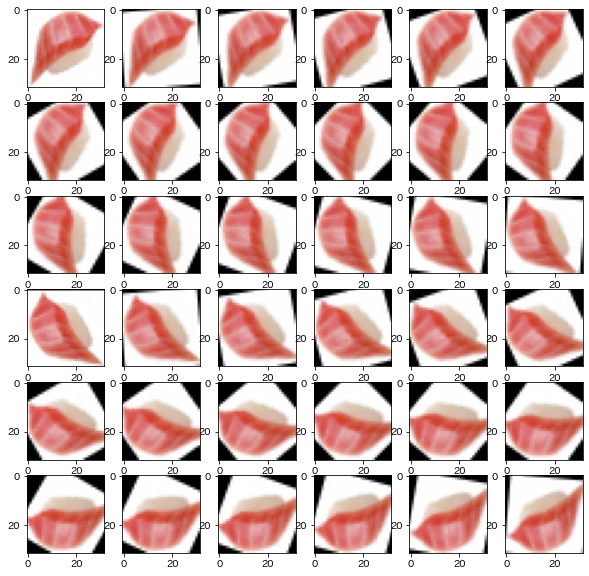

In [21]:
plt.figure(figsize=(10, 10))
for i in range(36):
    plt.subplot(6,6,i+1)
    #回転の実行
    center=(16,16)
    angle=i*5
    scale=1.0
    mtx=cv2.getRotationMatrix2D(center, angle, scale)
    img2=cv2.warpAffine(img, mtx, (32,32))
    plt.imshow(img2)
    
plt.show()

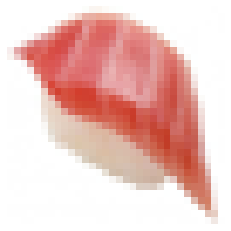

In [22]:
img3=cv2.flip(img,1)
plt.axis('off')
plt.imshow(img3)
plt.show()

In [28]:
"""
画像を読み込んで予測してみる
"""

import cnn_model
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

#ファイル名指定
target_image1="./image/test-sushi.jpg"
target_image2="./image/test-sarad.jpg"


#画像サイズ指定
im_rows=32
im_cols=32
im_color=3
in_shape=(im_rows, im_cols, im_color)
nb_classes=3

#ラベルとカロリーを指定
LABELS=['お寿司', 'サラダ', '麻婆豆腐']
CALORIES=[588, 118, 648]

#保存したCNNモデルの読み込み
clf=cnn_model.get_model(in_shape, nb_classes)
clf.load_weights('./image/photos-model-light.hdf5')

#画像を読み込んで、予測する
def check_photo(path):
    img=Image.open(path)
    img=img.convert("RGB")
    img=img.resize((im_cols, im_rows))
    plt.imshow(img)
    plt.show()
    #データ変換
    x=np.asarray(img)
    x=x.reshape(-1, im_rows, im_cols, im_color)
    x=x/255

    #予測
    pred=clf.predict([x])[0]
    idx=pred.argmax()
    per=int(pred[idx]*100)
    return (idx, per)

#結果を表示
def check_photo_str(path):
    idx, per=check_photo(path)
    #答えを表示
    print("この写真は", LABELS[idx], "で、カロリーは", CALORIES[idx], "kcal")
    print("可能性は", per, "%")

if __name__=='___main__':
    check_photo_str(target_image1)
#     check_photo_str(target_image2)


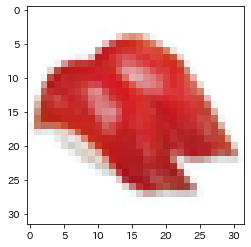

1/1 [==============================] - 0s 28ms/step
この写真は お寿司 で、カロリーは 588 kcal
可能性は 100 %


In [30]:
check_photo_str('./image/test-sushi.jpg')

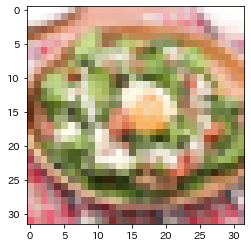

1/1 [==============================] - 0s 31ms/step
この写真は サラダ で、カロリーは 118 kcal
可能性は 100 %


In [31]:
check_photo_str('./image/test-sarad.jpg')